In [1]:
# -*- coding: UTF-8 -*-
from math import ceil

import matplotlib.pyplot as plt
import numpy as np
import pandas


In [2]:
X = pandas.read_json("..\\jsons\\main_X.json", lines = True)
Y = pandas.read_json("..\\jsons\\main_Y.json", lines = True)

In [3]:
X = X.astype({"Country":'float', "City":'float', "Institution": 'float'}) 

Y['connected'] = Y['connected'].astype(float)

In [29]:
full_df = X.copy()
full_df['connected'] = Y['connected']

connected_df = full_df[full_df['connected'] == 1]

full_df.head()


,Country,City,Institution,hIndex,Citations,Documents,jaccardCoef,Areas,connected
0,1.0,1.0,1.0,0.50000,0.08182,0.25000,0.04348,0.33333,1.0
1,0.0,0.0,0.0,0.20000,0.06478,0.16438,0.02128,0.35714,1.0
2,1.0,0.0,0.0,0.21053,0.10358,0.15584,0.08451,0.50000,1.0
3,0.0,0.0,0.0,0.36364,0.23207,0.19355,0.06250,0.44444,1.0
4,1.0,0.0,0.0,0.63333,0.53180,0.96104,0.05085,0.55556,1.0


In [30]:
connected_df.head()

,Country,City,Institution,hIndex,Citations,Documents,jaccardCoef,Areas,connected
0,1.0,1.0,1.0,0.50000,0.08182,0.25000,0.04348,0.33333,1.0
1,0.0,0.0,0.0,0.20000,0.06478,0.16438,0.02128,0.35714,1.0
2,1.0,0.0,0.0,0.21053,0.10358,0.15584,0.08451,0.50000,1.0
3,0.0,0.0,0.0,0.36364,0.23207,0.19355,0.06250,0.44444,1.0
4,1.0,0.0,0.0,0.63333,0.53180,0.96104,0.05085,0.55556,1.0


C:\Users\Rodrigo\AppData\Local\Temp\ipykernel_13796\3850907000.py:17: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax = plt.subplot2grid((shape_row,shape_column),(loc_row,loc_column))


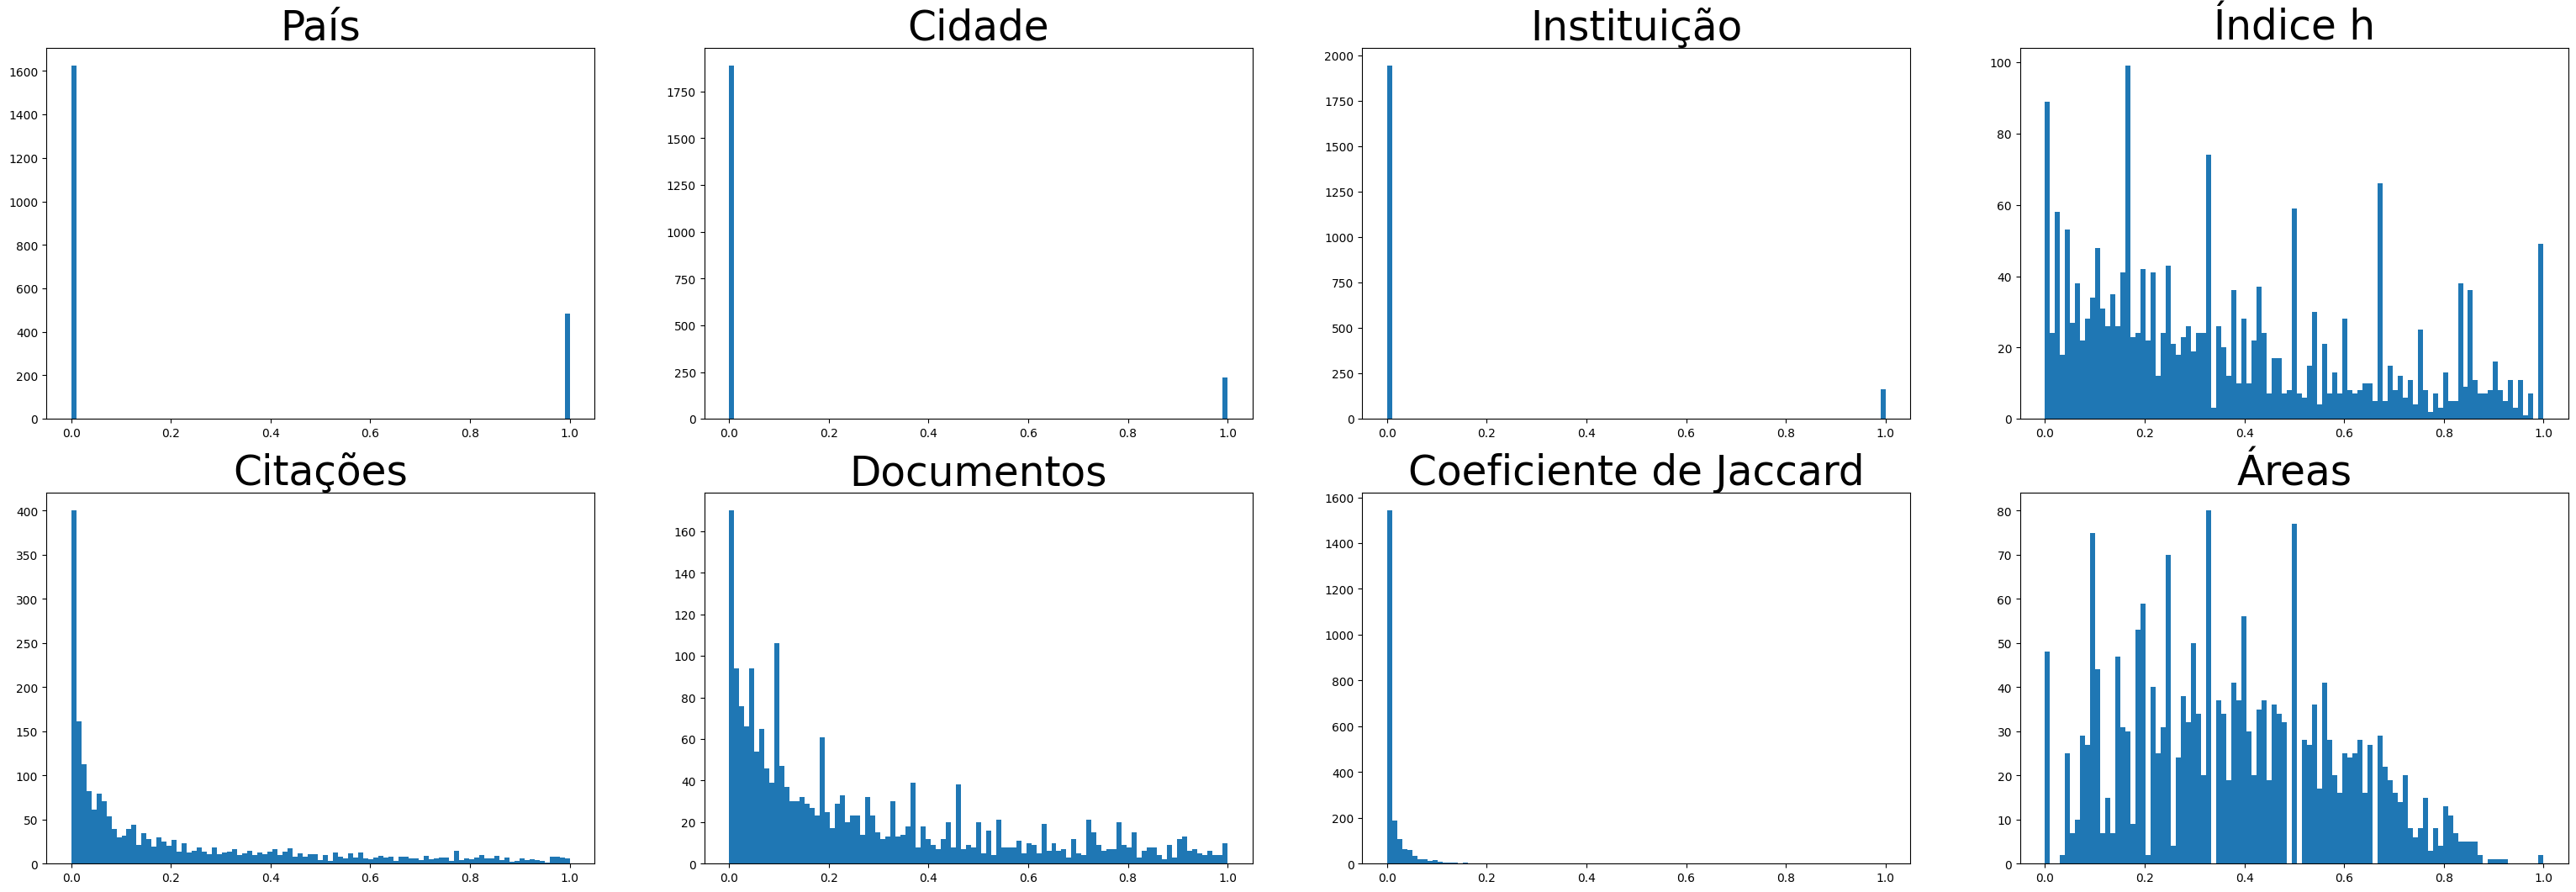

In [45]:
key_list = ["Country", "City", "Institution", "hIndex", "Citations", "Documents", "jaccardCoef", "Areas"]
label_list = ["País", "Cidade", "Instituição", "Índice h", "Citações", "Documentos", "Coeficiente de Jaccard", "Áreas"]

fig, axes = plt.subplots(figsize=(30, 10))

shape_column = 4
shape_row = ceil(len(key_list)/shape_column)

counter = 0
for i in range(len(key_list)):
	key = key_list[i]
	loc_column = counter % shape_column
	loc_row = counter // shape_column

	counts, bins = np.histogram(X[key].to_numpy(), bins = np.linspace(start = 0, stop = 1, num = 100))

	ax = plt.subplot2grid((shape_row,shape_column),(loc_row,loc_column))
	ax.hist(bins[:-1], bins, weights=counts)
	ax.set_title(label_list[i], size = 35)

	counter += 1

plt.subplots_adjust(left=0, right=1,
                    bottom=0, top=0.97,
                    wspace=0.2, hspace=0.2)
plt.show()

# X["ROI_label"].value_counts(sort = False).sort_index()